<a href="https://colab.research.google.com/github/Aabhas2/DataMining_Practicals/blob/main/DataMining_Practical_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)


In [3]:
print(X.head())
print(X.describe())
print(X.info())
print(y.value_counts())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [4]:
y.value_counts()

,count
1,71
0,59
2,48


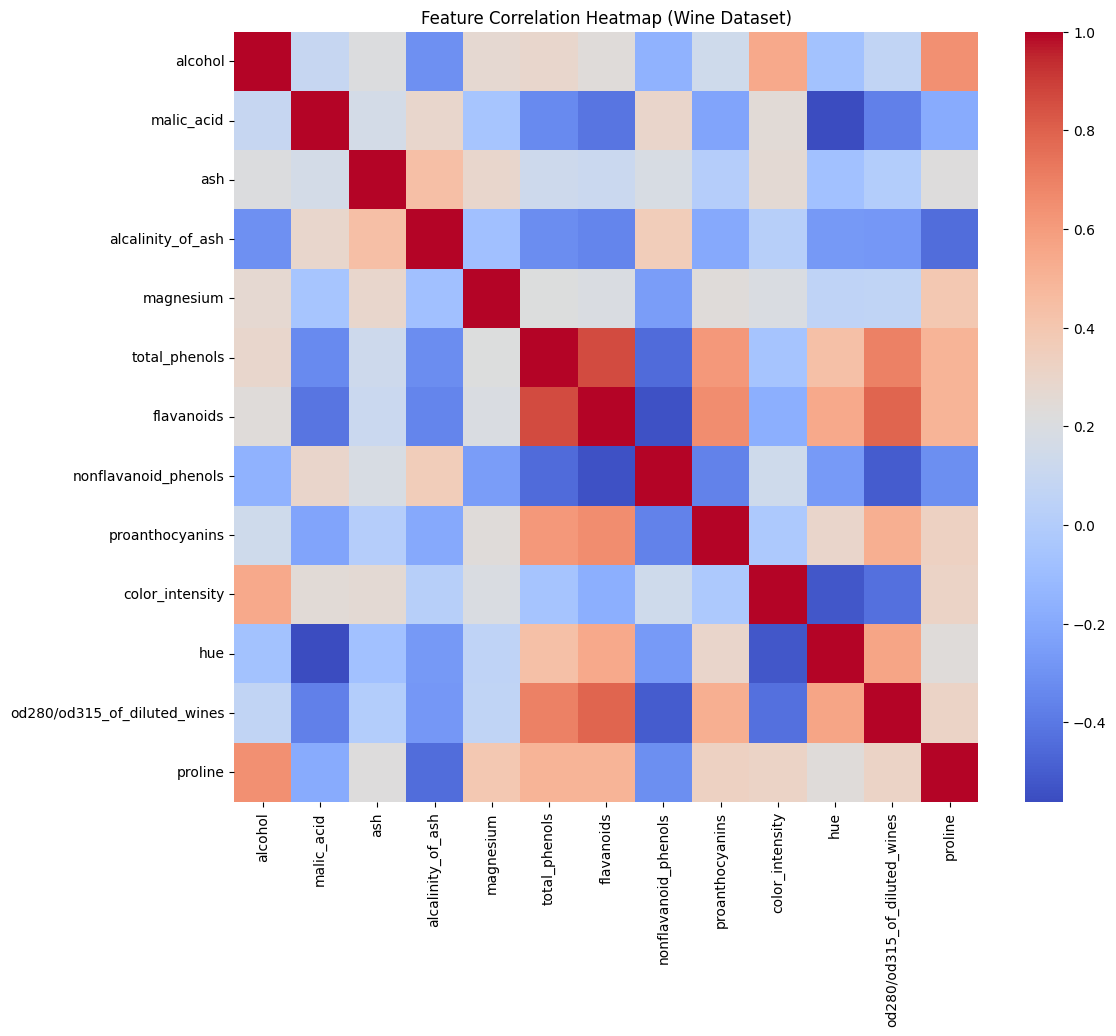

In [5]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap (Wine Dataset)")
plt.show()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
#  Standard Scaling (required for KNN & NB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


In [11]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9722222222222222
[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



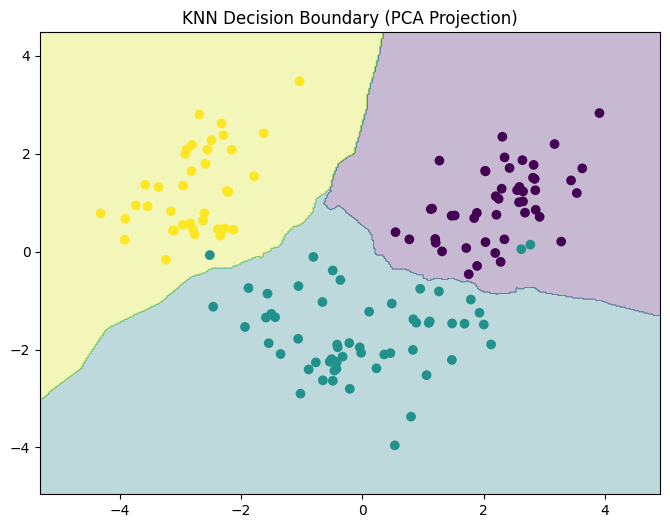

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

knn_small = KNeighborsClassifier(n_neighbors=5)
knn_small.fit(X_pca, y_train)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

Z = knn_small.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap="viridis")
plt.title("KNN Decision Boundary (PCA Projection)")
plt.show()


In [13]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [14]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9444444444444444
[[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]


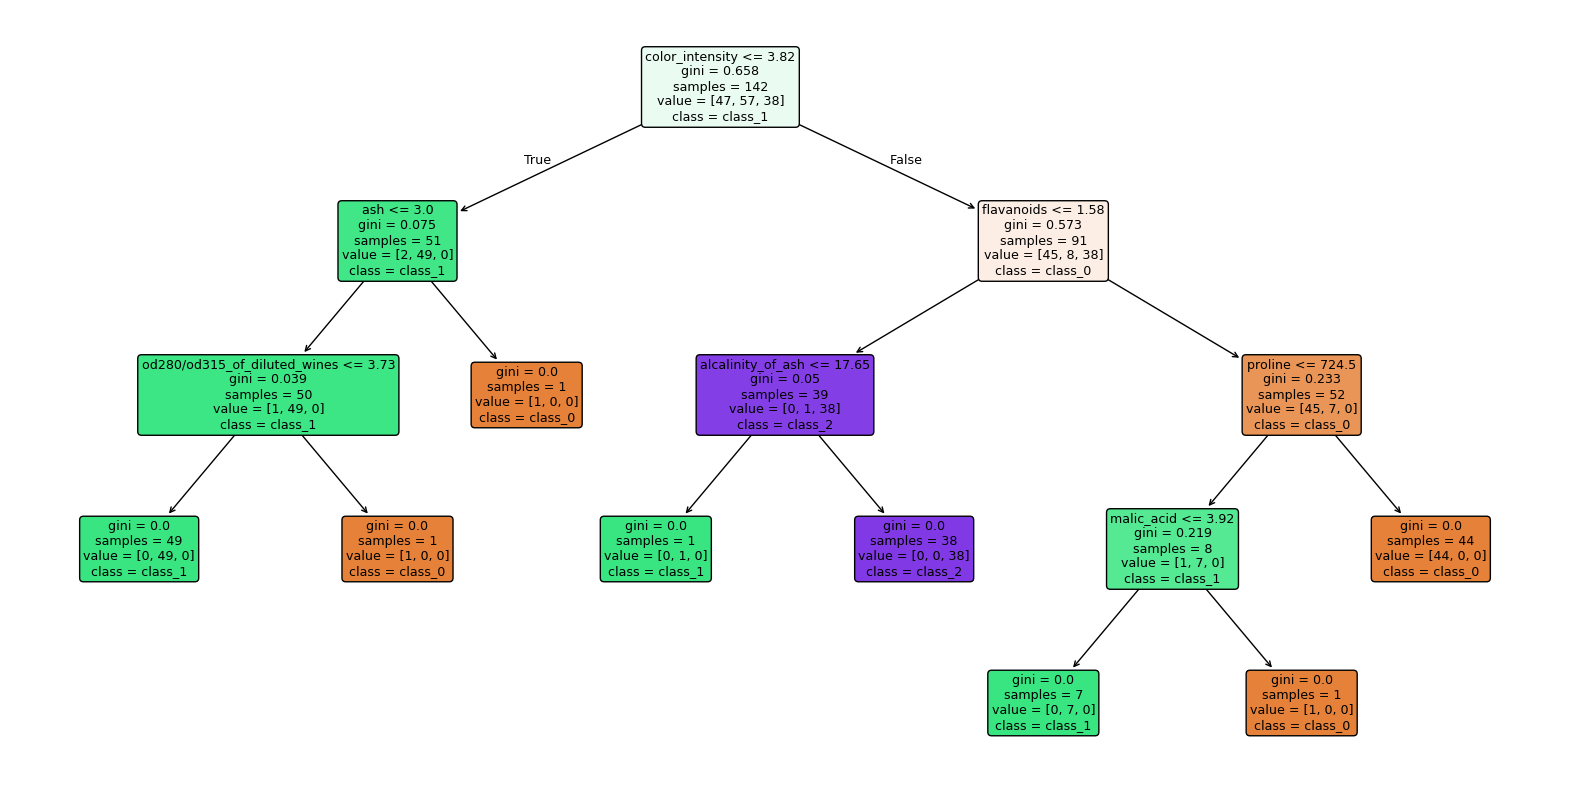

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt,
          feature_names=wine.feature_names,
          class_names=wine.target_names,
          filled=True, rounded=True)
plt.show()


In [16]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)


In [17]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9722222222222222
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



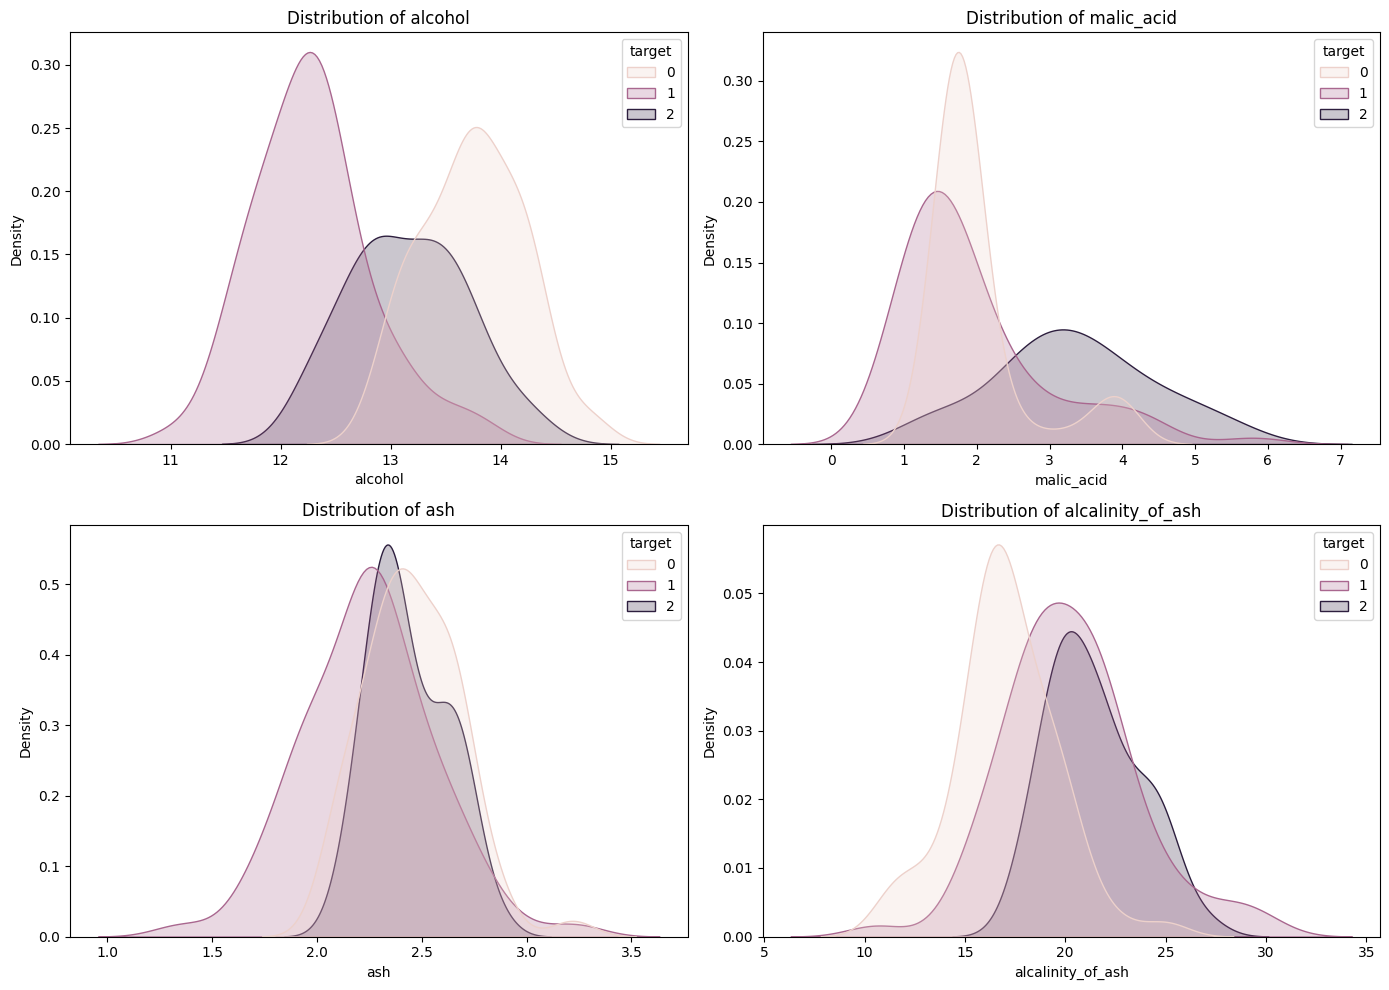

In [18]:
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

plt.figure(figsize=(14,10))
for i, col in enumerate(wine.feature_names[:4]):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=df, x=col, hue="target", fill=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [19]:
# K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(X_train_scaled)

labels = kmeans.predict(X_train_scaled)


In [20]:
pd.crosstab(y_train, labels)


col_0,0,1,2
row_0,,,
0,0,0,47
1,51,4,2
2,0,38,0


In [21]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_train_scaled, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.28802163614154114


In [22]:
results = {
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb)
}

pd.DataFrame(results, index=["Accuracy"]).T


,Accuracy
KNN,0.972222
Decision Tree,0.944444
Naive Bayes,0.972222
